# 커피숍 영업 현황

In [146]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#### 1). 데이터를 불러온다.

In [147]:
df = pd.read_csv('./data/data_coffee.csv', encoding = 'ms949')

In [148]:
df.shape

(46832, 23)

In [149]:
# df.info()
# df.isnull().sum()
df.head(3)

,number,companyName,adress,adressBystreet,dateOflicensing,stateOfbusiness,dateOfclosure,startdateOfcessation,duedateOfcessation,dateOfreOpen,...,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
0,1,#11(Sharp eleven),서울특별시 양천구 목동 956번지 롯데캐슬위너 상가동 107호(한두3길 44),"서울특별시 양천구 목동중앙북로 38 (목동,롯데캐슬위너 상가동 107호(한두3길 44))",20080917,운영중,NaN,NaN,NaN,NaN,...,NaN,2008.0,N,NaN,20.80,NaN,NaN,휴게음식점,커피숍,NaN
1,2,( 주)커피빈코리아청주지웰시티점,"충청북도 청주시 흥덕구 복대동 3379번지 신영지웰시티1차상업시설 124-1, 12...","충청북도 청주시 흥덕구 대농로 17 (복대동,신영지웰시티1차상업시설 124-1, 1...",20101124,운영중,NaN,NaN,NaN,NaN,...,NaN,2010.0,N,NaN,212.72,NaN,NaN,휴게음식점,커피숍,NaN
2,3,(aA)더블에이,경상북도 경산시 사동 39번지 108-2호,"경상북도 경산시 백자로10길 3-11, 108-2호 (사동)",20130902,운영중,NaN,NaN,NaN,NaN,...,NaN,2013.0,N,NaN,20.04,NaN,아파트지역,휴게음식점,커피숍,NaN


In [150]:
df.columns

Index(['number', 'companyName', 'adress', 'adressBystreet', 'dateOflicensing',
       'stateOfbusiness', 'dateOfclosure', 'startdateOfcessation',
       'duedateOfcessation', 'dateOfreOpen', 'areaOfsite', 'zip', 'waterwork',
       'numOfmenWorker', 'yearOfStart', 'multipleUse', 'grade', 'sizeOfsite',
       'numOfwomenWorker', 'vicintyOfsite', 'sanitaryName',
       'businessCondition', 'totalOfworker'],
      dtype='object')

현재 운영중인 커피숍:

In [151]:
df_on = df[df.stateOfbusiness == '운영중']

현재 폐업 상태의 커피숍:

In [152]:
df_off = df[df.stateOfbusiness == '폐업 등']

#### 2). 1997~2014년도 사이의 개업 횟수를 (yearOfStart) 도수분포표로 요약하고 시각화 하시오.

In [153]:
sr = df.yearOfStart.value_counts()
sr.sort_index(inplace=True)

In [154]:
sr = sr[(sr.index >= 1997) & (sr.index <= 2014)]

In [155]:
sr

1997.0      54
1998.0      54
1999.0      46
2000.0      89
2001.0     183
2002.0     398
2003.0     799
2004.0     648
2005.0     654
2006.0     863
2007.0    1233
2008.0    1579
2009.0    2489
2010.0    4172
2011.0    5942
2012.0    6315
2013.0    7270
2014.0    9905
Name: yearOfStart, dtype: int64

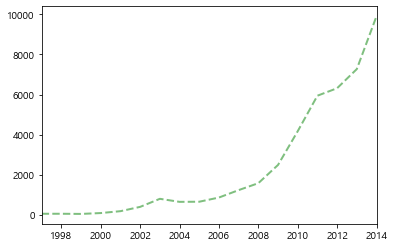

In [156]:
plt.plot(sr.index, sr.values, color='g', alpha=0.5, linewidth=2, linestyle='--')
plt.xlim([1997, 2014])
plt.show()

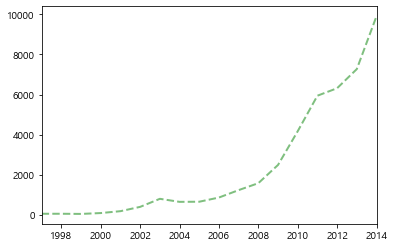

In [157]:
sr.plot.line(color='g', alpha=0.5, linewidth=2, linestyle='--')
plt.xlim([1997, 2014])
plt.show()

#### 3). 운영중인 커피숍 대상으로 1997~2014년도 사이의 개업 회수를 도수분포표로 요약하시오. 

In [158]:
df.stateOfbusiness.value_counts()

운영중     33587
폐업 등    13245
Name: stateOfbusiness, dtype: int64

In [159]:
df_on = df[df.stateOfbusiness == '운영중']
df_on.shape

(33587, 23)

In [160]:
sr_on = df_on.yearOfStart.value_counts()
sr_on.sort_index(inplace=True)
sr_on = sr_on[(sr_on.index >= 1997) & (sr_on.index <= 2014)]
sr_on

1997.0      21
1998.0      25
1999.0      23
2000.0      26
2001.0      76
2002.0     105
2003.0     163
2004.0     180
2005.0     204
2006.0     314
2007.0     496
2008.0     729
2009.0    1229
2010.0    2503
2011.0    3961
2012.0    4642
2013.0    6045
2014.0    9125
Name: yearOfStart, dtype: int64

#### 4). 폐업상태 커피숍 대상으로 1997~2014년도 사이의 개업 회수를 도수분포표로 요약하시오. 

In [161]:
df_off = df[df.stateOfbusiness == '폐업 등']

sr_off = df_off.yearOfStart.value_counts()
sr_off.sort_index(inplace=True)

sr_off = sr_off[(sr_off.index >= 1997) & (sr_off.index <= 2014)]

sr_off

1997.0      33
1998.0      29
1999.0      23
2000.0      63
2001.0     107
2002.0     293
2003.0     636
2004.0     468
2005.0     450
2006.0     549
2007.0     737
2008.0     850
2009.0    1260
2010.0    1669
2011.0    1981
2012.0    1673
2013.0    1225
2014.0     780
Name: yearOfStart, dtype: int64

#### 5). 위 #3과 #4 결과를 하나의 그래프로 시각화한다. 범례도 포함한다. 

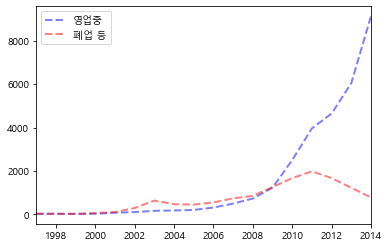

In [162]:
sr_on.plot.line(color='b', alpha=0.5, linewidth=2, linestyle='--', label='영업중')
sr_off.plot.line(color='r', alpha=0.5, linewidth=2, linestyle='--', label='폐업 등')
plt.xlim([1997, 2014])
plt.legend(loc=0)
plt.show()

## groupby를 이용해서 자동화하기